# OutlierRemover Processor Testing

This notebook provides testing of the CIL `OutlierRemover` processor with flower dataset

## 1. Import Libraries

In [1]:
from cil.io import TIFFStackReader
import numpy as np
import matplotlib.pyplot as plt
from cil.framework import ImageData, AcquisitionData, ImageGeometry, AcquisitionGeometry
from OutlierRemover import OutlierRemover
from cil.utilities.display import show2D, show_geometry
import cil


## 2. Load the Flower Reconstruction TIFF Image

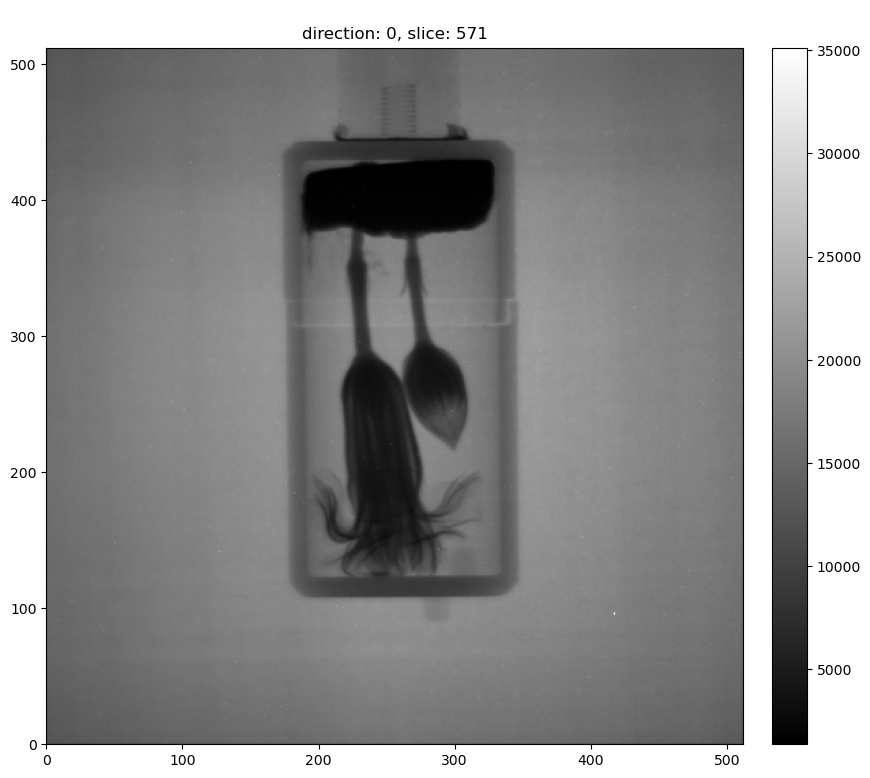

In [2]:

filename = r"C:\Programming\Mantid_Data\mantidimaging-data-main\mantidimaging-data-main\ISIS\IMAT\IMAT00010675\Tomo"
# %load ./snippets/03_exA.py
# create the TIFF reader by passing the directory containing the files
reader = TIFFStackReader(file_name=filename, dtype=np.float32)

# read in file, and return a numpy array containing the data
data_original = reader.read()

# use show2D to visualise the sinogram
show2D(data_original)

## 3. Convert to CIL ImageData

In [3]:
# Create ImageGeometry and ImageData
print("Array stored as:",type(data_original))
print("Array shape:\t",data_original.shape)
print("Array contents:\t",data_original.dtype)


Array stored as: <class 'numpy.ndarray'>
Array shape:	 (1143, 512, 512)
Array contents:	 float32


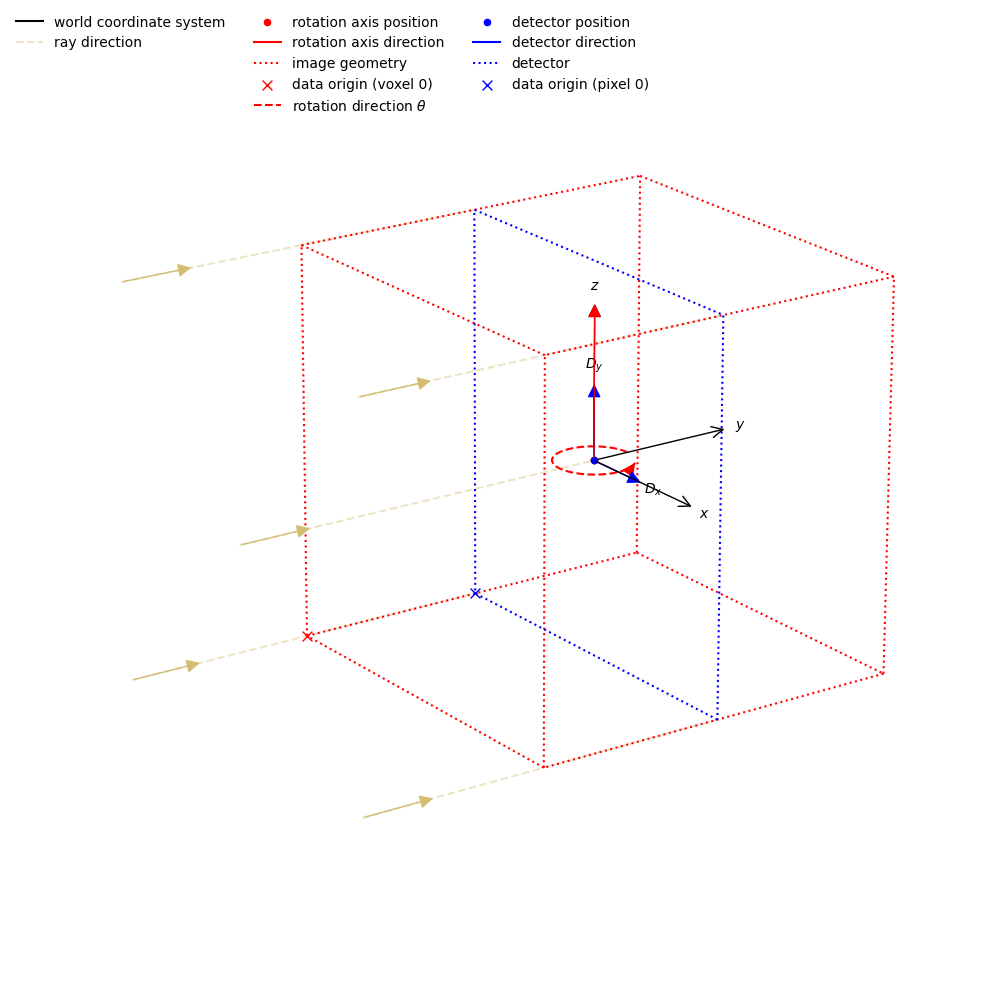

In [4]:
ag = AcquisitionGeometry.create_Parallel3D()\
    .set_panel(num_pixels=[512,512])\
    .set_angles(angles=np.linspace(0,360,1143))

show_geometry(ag)

In [5]:
ig = ag.get_ImageGeometry()


In [6]:
dataContainer = AcquisitionData(data_original, geometry=ag)
dataContainer_copy = dataContainer.copy()

In [23]:
outlier_removed_data = OutlierRemover(diff=500, radius=6, mode='bright')(dataContainer)

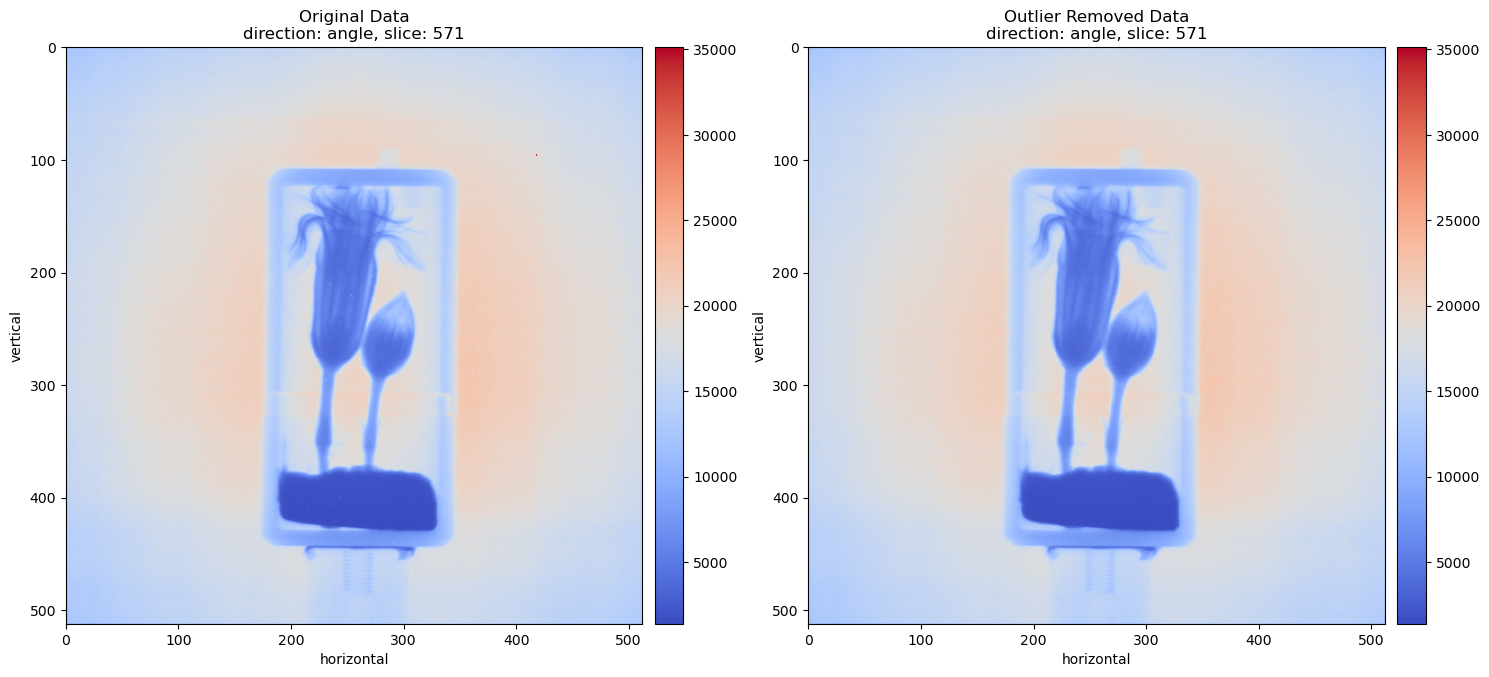

In [30]:
show2D([dataContainer_copy, outlier_removed_data], title=['Original Data', 'Outlier Removed Data'], fix_range=True, cmap ='coolwarm', origin='upper-left')

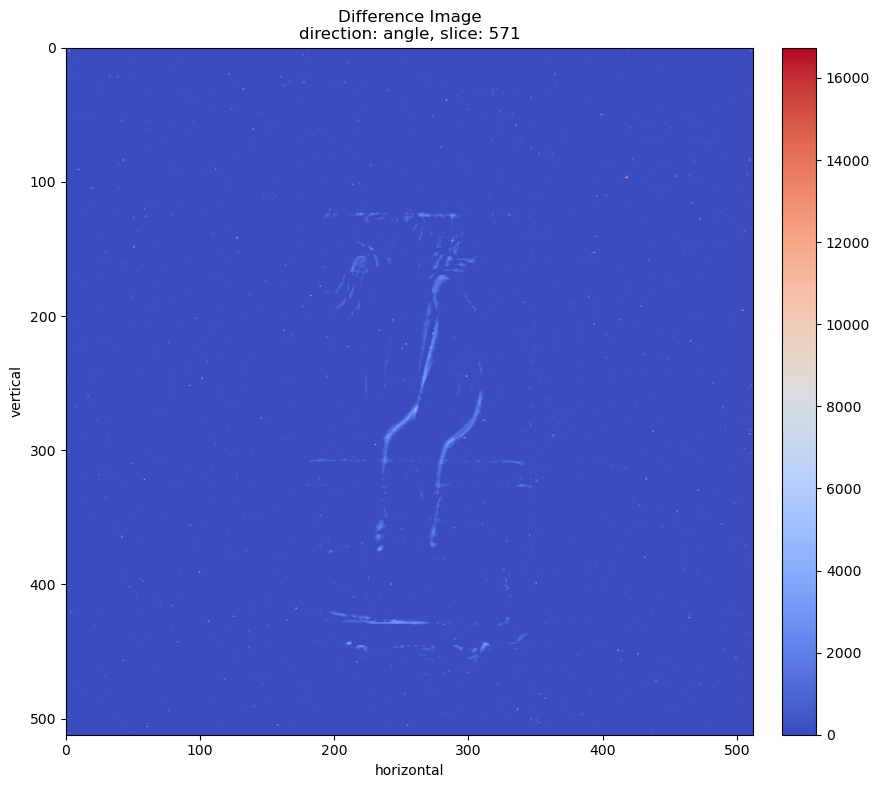

In [29]:
show2D(dataContainer_copy - outlier_removed_data, title='Difference Image', cmap='coolwarm', origin='upper-left')